In [2]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.1


In [3]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [4]:
# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.909 (0.031)


In [5]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.52169364,4.00560592,2.94756812,-0.09755101,-0.98835896,1.81021933,-0.32657994,1.08451928,4.98150546,-2.53855736,3.43500614,1.64660497,-4.1557091,-1.55301045,-0.30690987,-1.47665577,6.818756,0.5132918,4.3598337,-4.31785495]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


# Extra trees for Regression

In [6]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [7]:
# evaluate extra trees ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.240 (5.202)


In [8]:
# extra trees for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.56996683,0.80144889,2.77523539,1.32554027,-1.44494378,-0.80834175,-0.84142896,0.57710245,0.96235932,-0.66303907,-1.13994112,0.49887995,1.40752035,-0.2995842,-0.05708706,-2.08701456,1.17768469,0.13474234,0.09518152,-0.07603207]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 53


# Extra Trees Hyperparameters

>10 0.856 (0.027)
>50 0.897 (0.025)
>100 0.904 (0.027)
>500 0.910 (0.026)
>1000 0.909 (0.027)
>5000 0.909 (0.027)


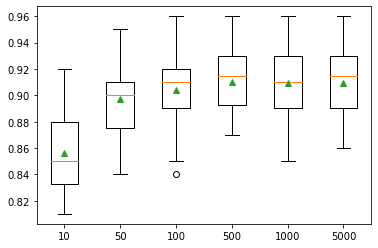

In [9]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = ExtraTreesClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Number of Features

>1 0.891 (0.029)
>2 0.901 (0.022)
>3 0.910 (0.023)
>4 0.905 (0.024)
>5 0.902 (0.025)
>6 0.913 (0.027)
>7 0.911 (0.027)
>8 0.915 (0.026)
>9 0.906 (0.024)
>10 0.914 (0.023)
>11 0.907 (0.027)
>12 0.907 (0.024)
>13 0.907 (0.024)
>14 0.907 (0.025)
>15 0.910 (0.023)
>16 0.906 (0.029)
>17 0.911 (0.024)
>18 0.909 (0.025)
>19 0.904 (0.026)
>20 0.906 (0.025)


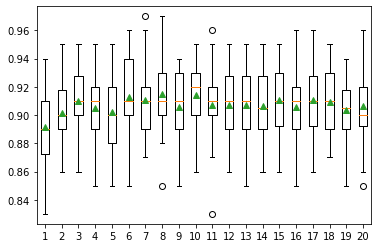

In [10]:
# explore extra trees number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1, 21):
		models[str(i)] = ExtraTreesClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Minimum Samples per Split

>2 0.905 (0.027)
>3 0.904 (0.028)
>4 0.907 (0.024)
>5 0.905 (0.022)
>6 0.903 (0.026)
>7 0.897 (0.030)
>8 0.899 (0.027)
>9 0.895 (0.029)
>10 0.895 (0.030)
>11 0.892 (0.028)
>12 0.889 (0.032)
>13 0.890 (0.029)
>14 0.892 (0.026)


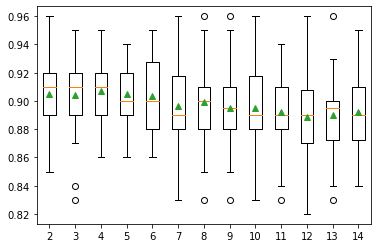

In [11]:
# explore extra trees minimum number of samples for a split effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore the number of samples per split from 2 to 14
	for i in range(2, 15):
		models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()